In [1]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import math
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

if os.name == 'nt':
    font_family = 'Malgun Gothic'
else:
    font_family = 'AppleGothic'
    
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

In [2]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


<AxesSubplot:xlabel='bmi', ylabel='target'>

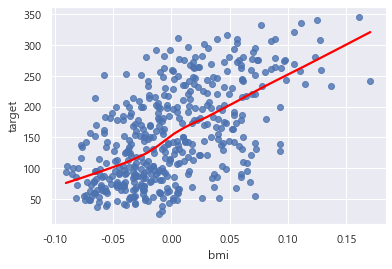

In [5]:
sns.regplot('bmi', 'target', lowess=True, line_kws={'color':'red'}, data=df)

Text(0.5, 1.0, 'rate')

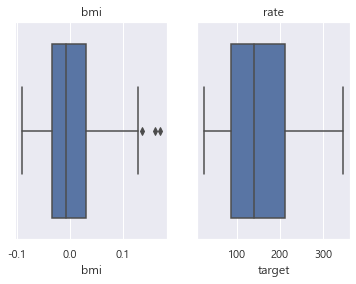

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.boxplot('bmi', data=df, ax=ax1)
ax1.set_title('bmi')

sns.boxplot('target', data=df, ax=ax2)
ax2.set_title('rate')

Text(0.5, 1.0, 'rate')

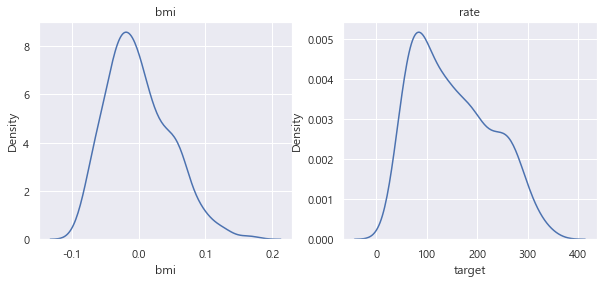

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

sns.kdeplot(df['bmi'], ax=ax1)
ax1.set_title('bmi')

sns.kdeplot(df['target'], ax=ax2)
ax2.set_title('rate')

In [8]:
import scipy.stats

print(scipy.stats.skew(df['bmi']))
print(scipy.stats.skew(df['target']))

0.5961166556214373
0.43906639932477265


In [9]:
x = df.bmi.values
y = df.target.values

l_train_x1 = x.reshape(-1, 1)
l_test_y1 = y.reshape(-1,1)
print(x.shape)
print(l_train_x1.shape)

(442,)
(442, 1)


In [10]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(l_train_x1, l_test_y1)

LinearRegression()

In [11]:
print(lr_model.coef_[0])
print(lr_model.intercept_)

[949.43526038]
[152.13348416]


In [12]:
lr_model.predict([[-2], [-1], [0], [1], [2]])

array([[-1746.73703661],
       [ -797.30177622],
       [  152.13348416],
       [ 1101.56874455],
       [ 2051.00400493]])

In [13]:
lr_prediction = lr_model.predict(l_train_x1)
lr_residuals = l_test_y1 - lr_prediction

In [14]:
SSE = (lr_residuals**2).sum()
SST = ((l_test_y1 - l_test_y1.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print(f'R_squared : {R_squared}')

R_squared : 0.3439237602253803


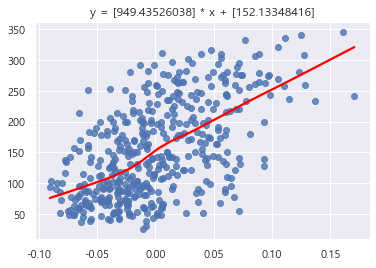

In [15]:
sns.regplot(l_train_x1, l_test_y1, lowess=True, line_kws = {'color':'red'},
           data = df)
plt.title(f'y = {lr_model.coef_[0]} * x + {lr_model.intercept_}')
plt.show()

In [17]:
from statsmodels.formula.api import ols

res_sr = ols('target ~ bmi', data = df).fit()
res_sr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           3.47e-42
Time:                        09:16:43   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.974     51.162      0.000     146.289     157.978
bmi          949.4353     62.515     15.187      0.000     826.570    1072.301
==============================================================================
Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
print(df.shape)
df.head(3)

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


In [19]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


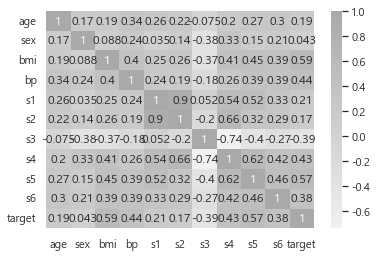

In [20]:
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap)
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression

dlr_train_x_df = df.copy()
dir_train_x_df = dlr_train_x_df.drop('target', 1)

dlr_test_y = df.target.values
dlr_test_y = dlr_test_y.reshape(-1,1)

In [29]:
dlr_model = LinearRegression()
dlr_model.fit(X = dlr_train_x_df, y = dlr_test_y)

print(f'절편 : {dlr_model.intercept_}')
print(f'회귀계수 : {dlr_model.coef_}')

절편 : [-5.68434189e-14]
회귀계수 : [[-1.19270306e-15 -2.78038396e-13 -5.38602661e-13  1.28300452e-13
   8.67537229e-13 -7.13273554e-13 -3.20397275e-13  3.73845408e-14
  -4.24552568e-13 -1.48423464e-14  1.00000000e+00]]


In [30]:
prediction = dlr_model.predict(dlr_train_x_df)
residuals = dlr_test_y - prediction

In [31]:
SSE = (residuals ** 2).sum()
SST = ((dlr_test_y - dlr_test_y.mean())**2).sum()
R_squared = 1-(SSE/SST)
print(f'R_squared : {R_squared}')

R_squared : 1.0


In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(dlr_test_y, prediction)
print(mse)
rmse = sqrt(mse)
print(rmse)

print('score = ', dlr_model.score(X=dlr_train_x_df, y=dlr_test_y))
print('mean_squared_error = ', mse)
print('RMSE = ', rmse)

1.1929861371011117e-27
3.4539631397875566e-14
score =  1.0
mean_squared_error =  1.1929861371011117e-27
RMSE =  3.4539631397875566e-14


In [33]:
print(df.shape)
df.head(3)

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


In [34]:
from statsmodels.formula.api import ols

s_d_model = ols('target ~ age+sex+bmi+bp+s1+s2+s3+s4+s5+s6', df)

m_result = s_d_model.fit()

In [35]:
m_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           3.83e-62
Time:                        09:26:57   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
sex         -239.8191     61.222     -3.917      0.000    -360.151    -119.488
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s1          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
s2           476.7458    339.035      1.406      0.160    -189.621    1143.113
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(s_d_model.exog_names)

print(variance_inflation_factor(s_d_model.exog, 1))

pd.DataFrame({'컬럼' : column, 'VIF' : variance_inflation_factor(s_d_model.exog, i)}
            for i, column in enumerate(s_d_model.exog_names)
            if column != 'Intercept')

['Intercept', 'age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
1.2173065764321338


,컬럼,VIF
0,age,1.217307
1,sex,1.278073
2,bmi,1.509446
3,bp,1.459429
4,s1,59.203786
5,s2,39.194379
6,s3,15.402352
7,s4,8.890986
8,s5,10.076222
9,s6,1.484623


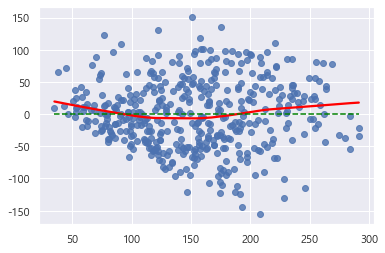

In [38]:
s_d_res_fit = m_result.predict(df)
s_d_residuals = df['target'] - s_d_res_fit

sns.regplot(s_d_res_fit, s_d_residuals, lowess=True, line_kws={'color':'red'})
plt.plot([s_d_res_fit.min(), s_d_res_fit.max()], [0, 0], '--', color='green')

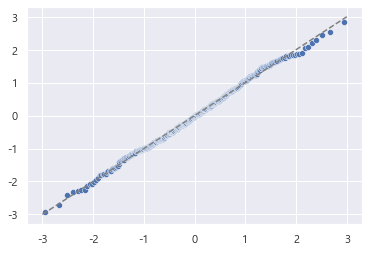

In [39]:
s_d_sr = stats.zscore(s_d_residuals)
(s_d_x, s_d_y), _ = stats.probplot(s_d_sr)

sns.scatterplot(s_d_x, s_d_y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

<AxesSubplot:>

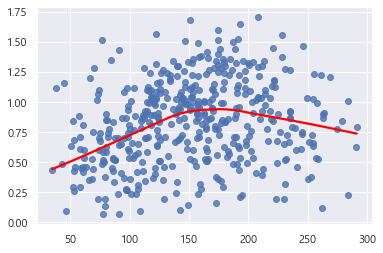

In [40]:
sns.regplot(s_d_res_fit, np.sqrt(np.abs(s_d_sr)), lowess=True, line_kws={'color':'red'})

In [41]:
from statsmodels.stats.outliers_influence import OLSInfluence

cd, _ = OLSInfluence(m_result).cooks_distance
cd.sort_values(ascending=False).head()

382    0.024475
123    0.021349
169    0.019560
304    0.018942
92     0.018134
dtype: float64